In [1]:
import pickle
from minedatabase.pickaxe import Pickaxe
import seaborn as sns
import pandas as pd
from copy import deepcopy, copy

import seaborn as sns
import matplotlib.pyplot as plt

from minedatabase.thermodynamics import Thermodynamics

thermo = Thermodynamics()
thermo.load_thermo_from_postgres()

# sns.set_palette("pastel")

In [2]:
pk = Pickaxe()
pk.load_pickled_pickaxe("ecoli_metab_100t300r200.pk")

dg_df = pd.read_csv("thermo_dataframe_physiological.csv")
feas_df = pd.read_csv("feasibility_dataframe.csv")

----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading ecoli_metab_100t300r200.pk pickled data.
Loaded 21336 compounds
Loaded 38175 reactions
Loaded 50 operators
Took 0.452686071395874


<AxesSubplot:xlabel='value', ylabel='error'>

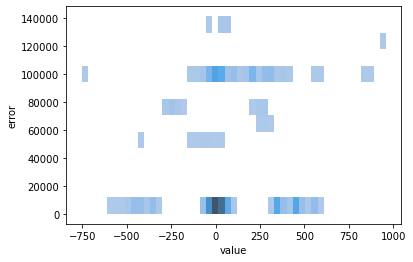

In [3]:
dg_df.columns
sns.histplot(x="value", y="error", data=dg_df)

# Investigate High Uncertainty

In [4]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [5]:
# rxn1

In [65]:
high_unc_rxns = dg_df[dg_df.error < 40]["_id"].to_list()

r_id = high_unc_rxns[3]
print(pk.reactions[r_id])
rcts = [cpd[1] for cpd in pk.reactions[r_id]["Reactants"]]
pds = [cpd[1] for cpd in pk.reactions[r_id]["Products"]]

rcts_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in rcts]
pds_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in pds]

{cpd: not cpd.group_vector for cpd in flatten([rcts_eq, pds_eq])}

{'_id': 'R3aa94696bec809ec6b76649dd079fac1b8593248a8b52189cec272808071e972', 'Reactants': [(2, 'Ca3b7244a6046316e687bb3c126a8515f7cd384ea'), (1, 'X8dc023d8052d83fb6feadf8541387e57c199cad0')], 'Products': [(1, 'Cd6cd3326d9e6e129503f3b56f437a38935e8eccb'), (1, 'Cbfdb0a5964c81f70a798ddb005433d2e6408caa9'), (1, 'Xad024c97bc6d1c83baf5d8902af02c3a3db5358e')], 'Operators': ['rule0045'], 'SMILES_rxn': '(2) O=C(O)CC(O)C(O)CC(=O)C(=O)O + (1) O=O => (1) O=C(O)C(=O)CC(O)C(O)CO + (1) O=C(O)CC(O)C(O)C(O)C(=O)C(=O)O + (1) O=C=O'}


{Compound(id=469531, inchi_key=LLBCAJMKUMLADE-UHFFFAOYSA-L): False,
 Compound(id=7, inchi_key=MYMOFIZGZYHOMD-UHFFFAOYSA-N): True,
 Compound(id=695760, inchi_key=VJJXZTAKKXTSAW-UHFFFAOYSA-N): False,
 Compound(id=694613, inchi_key=WPAMZTWLKIDIOP-UHFFFAOYSA-N): False,
 Compound(id=16, inchi_key=CURLTUGMZLYLDI-UHFFFAOYSA-N): True}

## Reaction 2

In [7]:
high_unc_rxns = dg_df[dg_df.error > 10000]["_id"].to_list()

r_id = high_unc_rxns[1]
print(pk.reactions[r_id])
rcts = [cpd[1] for cpd in pk.reactions[r_id]["Reactants"]]
pds = [cpd[1] for cpd in pk.reactions[r_id]["Products"]]

rcts_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in rcts]
pds_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in pds]

{cpd: not cpd.group_vector for cpd in flatten([rcts_eq, pds_eq])}

{'_id': 'R5c72665366a072a7be2342a0590bbea0aee3c27ca8dfd45f8e06670398614f27', 'Reactants': [(1, 'Xa2a868d3f3866d6bfbbe78b615e42f81511ebff8'), (1, 'Cf031a98796cbfbdb29218e9bf890a0664e5c66b0')], 'Products': [(1, 'C5976b2a69df3a14341c45c62cfeff2f01ad89559'), (1, 'C68c8c0a5e3a3101108f81caa2059e18db40f4df1')], 'Operators': ['rule0037'], 'SMILES_rxn': '(1) Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C2O)c(=O)[nH]1 + (1) O=P(O)(O)OP(=O)(O)O => (1) Nc1nc2c(ncn2C2OC(CO)C(O)C2O)c(=O)[nH]1 + (1) O=P(O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O'}


{Compound(id=14, inchi_key=XPPKVPWEQAFLFU-UHFFFAOYSA-K): True,
 Compound(id=495033, inchi_key=KDFXXNGTULMGMF-UHFFFAOYSA-I): False,
 Compound(id=694561, inchi_key=NYHBQMYGNKIUIF-UHFFFAOYSA-N): False,
 Compound(id=696225, inchi_key=LSYVCAOPFHHUHM-UHFFFAOYSA-N): True}

In [8]:
pds_eq[-1].smiles

'O=P(O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)OP(=O)(O)O'

## Rxn3

In [9]:
high_unc_rxns = dg_df[dg_df.error > 10000]["_id"].to_list()

r_id = high_unc_rxns[2]
print(pk.reactions[r_id])
rcts = [cpd[1] for cpd in pk.reactions[r_id]["Reactants"]]
pds = [cpd[1] for cpd in pk.reactions[r_id]["Products"]]

rcts_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in rcts]
pds_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in pds]

{cpd: not cpd.group_vector for cpd in flatten([rcts_eq, pds_eq])}

{'_id': 'R2b387404bd9eca55987a72bfc7296b1f8a77b7c7fea32f941d03b1d28d643d89', 'Reactants': [(1, 'C00d5173ce57b441b2c94511ec509bd300df17cf6'), (1, 'X73bc8ef21db580aefe4dbc0af17d4013961d9d17')], 'Products': [(1, 'C148edd1b7e4448960973140813259d8c10f663f3'), (1, 'C24f799b65f77e5bef0585b5d5138bb22868a8c16')], 'Operators': ['rule0013'], 'SMILES_rxn': '(1) C#CNC(C)C(=O)O + (1) O => (1) C#CO + (1) CC(N)C(=O)O'}


{Compound(id=694329, inchi_key=LXAXDNARFSIPLO-UHFFFAOYSA-N): False,
 Compound(id=5, inchi_key=XLYOFNOQVPJJNP-UHFFFAOYSA-N): True,
 Compound(id=694889, inchi_key=QFXZANXYUCUTQH-UHFFFAOYSA-N): True,
 Compound(id=691598, inchi_key=QNAYBMKLOCPYGJ-UHFFFAOYSA-N): False}

# Get only single new compound reactions

In [20]:
high_unc_rxns = dg_df[dg_df.error > 10000]["_id"].to_list()
rids = []
for r_id in range(100): #len(high_unc_rxns)):
    r_id = high_unc_rxns[r_id]
    rcts = [cpd[1] for cpd in pk.reactions[r_id]["Reactants"]]
    pds = [cpd[1] for cpd in pk.reactions[r_id]["Products"]]

    rcts_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in rcts]
    pds_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in pds]
    if sum([cpd.id > 600000 for cpd in flatten([rcts_eq, pds_eq])]) == 1:
        rids.append(r_id)
        print(r_id)



R521ed646fdf445a3605a6b462cd1ef533791a3ef025d5a12de4caaa6f6a609e4
Rc7f7b42f04f857e1c3a369e80e480cd1a8e27caab65f410c708209c6991e7d65
R8559dda78df092c57789e0cefea667498ac2dbe404c4b6bc2b0044f06aed656a
R97dccefce9de46f94e77d3ef5df07d8711f6ae4b1bf537a1c2fa6e925ac0a58b
R9d44c7713252bfc75a4a07bdb1e3a1c0bf31518e808279af67222b03b03c917d
R3b4fbc52c3b37ce3cecaa3b122e740ccedd92ab0d920e2e114f1626d4200cdca
Rc17b991b5f1a32b05b584e6c8f0bb2e96e912bd012b5157ea35d0d2499417c9e
R300aad3a34f0a93c8936d95d8a05fc08f8e27cf5828a1764c27730107edd362f
R8d20c593094a34f78ef634630d709a88668060fb629f479062ccf75853b1d1c9
R7f57a465b5aa1935cf20c325e4f5b211ddfd62013e2e22a726929aa0523df62b
Rdb519669f3a91e80b522817664c79455eb9840e50c836540f1cdd7008bed9545
R5eb508e8aafe62c3f3f1e169b3578eca2afaf285030bac2b643962dd2a67857e
Rfd765776f82c5568bde558851975da74593c67ed0274de94d8fc8e90e03f34f2
R638ec30215bec2414b97dd9653d95f1c363e232149c2079191f7f6c559fb2dbd
R88b437d2eea9f82f1f71e5c1756c4881cbfd7ceaaa7ef3b2bde6a27b3c696a56
R0dce76d9d

In [39]:
high_unc_rxns = dg_df[dg_df.error > 10000]["_id"].to_list()

r_id = rids[2]
print(pk.reactions[r_id])
rcts = [cpd[1] for cpd in pk.reactions[r_id]["Reactants"]]
pds = [cpd[1] for cpd in pk.reactions[r_id]["Products"]]

rcts_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in rcts]
pds_eq = [thermo.get_eQ_compound_from_cid(_id, pk) for _id in pds]

{cpd: not cpd.group_vector for cpd in flatten([rcts_eq, pds_eq])}

{'_id': 'R8559dda78df092c57789e0cefea667498ac2dbe404c4b6bc2b0044f06aed656a', 'Reactants': [(1, 'Xa2a868d3f3866d6bfbbe78b615e42f81511ebff8'), (1, 'C048be877d9ebfc606365d9e79d0da5255a87db33')], 'Products': [(1, 'Ca6b721f00d9518265310a77de05506e127461edc'), (1, 'Cf765878174ce76048d894f34fc5f45795dd3f54a')], 'Operators': ['rule0037'], 'SMILES_rxn': '(1) C[N+](C)(C)CCOP(=O)(O)OCC(O)CO + (1) O=P(O)(O)OP(=O)(O)O => (1) C[N+](C)(C)CCO + (1) O=P(O)(O)OP(=O)(O)OP(=O)(O)OCC(O)CO'}


{Compound(id=14, inchi_key=XPPKVPWEQAFLFU-UHFFFAOYSA-K): True,
 Compound(id=494894, inchi_key=SUHOQUVVVLNYQR-UHFFFAOYSA-N): False,
 Compound(id=85, inchi_key=OEYIOHPDSNJKLS-UHFFFAOYSA-N): False,
 Compound(id=695283, inchi_key=GCYZRQQEBNFQTK-UHFFFAOYSA-N): False}

In [40]:
thermo.physiological_dg_prime_from_rid(r_id, pk)

<Measurement(-196.38170600189312, 70715.2515755897, kilojoule / mole)>

In [50]:
from equilibrator_api import Reaction, ComponentContribution
from equilibrator_cache import CompoundCache
from equilibrator_assets.local_compound_cache import LocalCompoundCache

from sqlalchemy import create_engine

# Connect to my db, using postgresql
lc = LocalCompoundCache()
lc.ccache = CompoundCache(create_engine("postgresql:///eq_compounds"))

cc = ComponentContribution()

# Define Reaction + Get Compounds

In [56]:
# Define things manually just for example
rxn_smarts = "C[N+](C)(C)CCOP(=O)(O)OCC(O)CO.O=P(O)(O)OP(=O)(O)O>>C[N+](C)(C)CCO.O=P(O)(O)OP(=O)(O)OP(=O)(O)OCC(O)CO"
stoichiometry = [(-1, "C[N+](C)(C)CCOP(=O)(O)OCC(O)CO"), (-1, "O=P(O)(O)OP(=O)(O)O"), (1, "C[N+](C)(C)CCO"), (1, "O=P(O)(O)OP(=O)(O)OP(=O)(O)OCC(O)CO")]
eq_cpds = [thermo.lc.get_compounds(smi[1]) for smi in stoichiometry]

# Check to see which compounds already existed, all but last
eq_cpds


[Compound(id=494894, inchi_key=SUHOQUVVVLNYQR-UHFFFAOYSA-N),
 Compound(id=14, inchi_key=XPPKVPWEQAFLFU-UHFFFAOYSA-K),
 Compound(id=85, inchi_key=OEYIOHPDSNJKLS-UHFFFAOYSA-N),
 Compound(id=695283, inchi_key=GCYZRQQEBNFQTK-UHFFFAOYSA-N)]

# Generate eQ Reaction and get dgs

In [60]:
# Define reaction string manually and then create dictionary mapping letters to compounds
rxn_str = "1 A + 1 B => 1 C + 1 D"
eq_dict = {letter: eq_cpd for letter, eq_cpd in zip(["A", "B", "C", "D"], eq_cpds)}

# Generate reaction
eq_rxn = Reaction.parse_formula(eq_dict.get, rxn_str)
assert eq_rxn.is_balanced

# Calculate some dgs
phys_dg = cc.physiological_dg_prime(eq_rxn)
stand_dg = cc.standard_dg(eq_rxn)

print(f"Physiological: {phys_dg}\nStandard: {stand_dg}")

Physiological: (-0 +/- 7)e+04 kilojoule / mole
Standard: (-0 +/- 7)e+04 kilojoule / mole


## The +/- value is huge. Only one compound isn't found in eQuilibrator natively

In [61]:
cc.standard_dg_formation(eq_cpds[-1])

(-3102.6472748627743,
 array([-2.67970674e-01,  8.23626660e-02,  3.04228063e-01,  7.90757656e-02,
         2.82306133e-01,  1.10700107e-01,  1.33035931e-01,  6.24950906e-02,
         2.63900031e-02, -2.47208841e-01,  2.31974865e-02,  4.28275078e-02,
         3.11713549e-04, -4.12537697e-01,  3.37777966e-01,  3.26368550e-03,
         9.31486451e-02,  4.39016997e-01,  7.63176546e-02, -8.38796678e-01,
        -4.24964393e-01, -1.67297077e-03,  2.92105881e-02,  2.39814631e-01,
         9.53807951e-01,  1.81098875e-01, -6.72711860e-02,  3.25526411e-02,
        -3.45336145e-01, -4.13905600e-01, -6.47759708e-03, -3.63504567e-01,
        -3.05234650e-02,  1.18452749e-01, -4.24573862e-01, -1.86168059e-01,
         6.94939758e-02,  9.62617676e-03, -3.43545461e-02, -2.62026341e-01,
         9.54157318e-02, -4.59664895e-03, -9.51503737e-03,  4.13447358e-01,
        -6.04660297e-02,  1.13834452e-16, -3.27680864e-01,  5.81386502e-03,
         1.53482109e-01,  1.45888962e-01,  7.31436890e-03, -1.2712